In [144]:
import pandas as pd
import numpy as np

## Carregando o dataset

In [145]:
df = pd.read_csv('tweets_raw_sem_duplicata.csv')
df.head()

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,trend_t,score,sentiment
0,0,Wed Feb 22 19:05:12 +0000 2023,1628470980925423620,1628470980925423620,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,False,"{'hashtags': [{'text': 'MoonlightChickenEP5', 'indices': [11, 31]}, {'text': 'HEARTLIMING', 'indices': [33, 45]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1628470977553174528, 'id_str': '1628470977553174528', 'indices': [46, 69], 'media_url': 'http://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'url': 'https://t.co/Tbp1Gdy7ll', 'display_url': 'pic.twitter.com/Tbp1Gdy7ll', 'expanded_url': 'https://twitter.com/twayvl/status/1628470980925423620/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 736, 'h': 752, 'resize': 'fit'}, 'large': {'w': 736, 'h': 752, 'resize': 'fit'}, 'small': {'w': 666, 'h': 680, 'resize': 'fit'}}}]}","{'media': [{'id': 1628470977553174528, 'id_str': '1628470977553174528', 'indices': [46, 69], 'media_url': 'http://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'url': 'https://t.co/Tbp1Gdy7ll', 'display_url': 'pic.twitter.com/Tbp1Gdy7ll', 'expanded_url': 'https://twitter.com/twayvl/status/1628470980925423620/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 736, 'h': 752, 'resize': 'fit'}, 'large': {'w': 736, 'h': 752, 'resize': 'fit'}, 'small': {'w': 666, 'h': 680, 'resize': 'fit'}}}]}","{'iso_language_code': 'pt', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,False,0,0,False,False,False,pt,MoonlightChickenEP5,0.0000,1
1,1,Wed Feb 22 19:03:55 +0000 2023,1628470659444613122,1628470659444613122,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",True,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/P0Cjt7iTyU', 'expanded_url': 'https://twitter.com/i/web/status/1628470659444613122', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}",NaN,"{'iso_language_code': 'pt', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,False,0,0,False,False,False,pt,MoonlightChickenEP5,0.2263,2
2,2,Wed Feb 22 19:03:34 +0000 2023,1628470570709925890,1628470570709925890,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,False,"{'hashtags': [{'text': 'MoonlightChickenEP5', 'indices': [50, 70]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1628470563600490502, 'id_str': '1628470563600490502', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'url': 'https://t.co/WHzEhLJK62', 'display_url': 'pic.twitter.com/WHzEhLJK62', 'expanded_url': 'https://twitter.com/jmwpallet/status/1628470570709925890/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1600, 'h': 720, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 540, 'resize': 'fit'}, 'small': {'w': 680, 'h': 306, 'resize': 'fit'}}}]}","{'media': [{'id': 1628470563600490502, 'id_str': '1628470563600490502', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'url': 'https://t.co/WHzEhLJK62', 'display_url': 'pic.twitter.com/WHzEhLJK62', 'expanded_url': 'https://twitter.com/jmwpallet/status/1628470570709925890/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize':

In [146]:
# separando apenas as variáveis que quero visualizar
tweet_df = df[['text','trend_t','sentiment']]
tweet_df.head()

,text,trend_t,sentiment
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,MoonlightChickenEP5,1
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",MoonlightChickenEP5,2
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,MoonlightChickenEP5,1
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,MoonlightChickenEP5,1
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",MoonlightChickenEP5,2


In [147]:
tweet_df['sentiment'].value_counts()

1    6435
0    6029
2    4912
Name: sentiment, dtype: int64

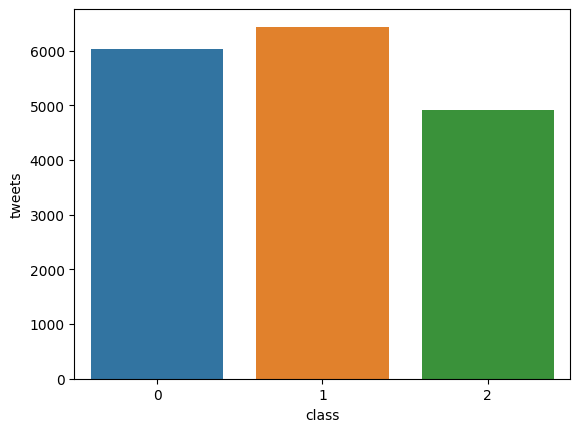

In [148]:
# visualizando os dados em gráfico
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=tweet_df.sentiment)
plt.xlabel('class')
plt.ylabel('tweets')
plt.show();

## Efentuando a limpeza dos dados

In [149]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [150]:
# baixando as stopwords
!python -m nltk.downloader stopwords

C:\Users\alsvi\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alsvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
import nltk
import re

In [152]:
def remove_caracteres(instancia):
    ''' 
    Função de remoção de caracteres:
    'http\S+' - remove url 
    lower() - tranforma o texto em minúsculo
    '[0-9]+' - remove números
    '[^\w\s]' -  remove pontuação
    '[!#$%^&*()]' - remove caractéres espaciais
    '''
    instancia = re.sub(r'http\S+', '', instancia).lower()
    instancia = re.sub(r'[0-9]+', '', instancia)
    instancia = re.sub(r'[^\w\s]', '', instancia)
    instancia = re.sub('[!#$%^&*()]', '', instancia)
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (' '.join(palavras))

In [153]:
def remove_emojis(string):
    '''Função que remove emojis'''
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [154]:
# aplicando a limpeza dos dados
tweet_df['text_clean'] = tweet_df['text'].apply(remove_caracteres).apply(remove_emojis)

pd.set_option('display.max_colwidth', None)
tweet_df.head()

C:\Users\alsvi\AppData\Local\Temp\ipykernel_19668\1715463276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_clean'] = tweet_df['text'].apply(remove_caracteres).apply(remove_emojis)


,text,trend_t,sentiment,text_clean
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,MoonlightChickenEP5,1,atuam moonlightchickenep heartliming
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",MoonlightChickenEP5,2,fazem acreditar relacionamento amigos funciona cedo tarde vai desmoronar
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,MoonlightChickenEP5,1,pq sinto q aqui vai dar briga moonlightchickenep
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,MoonlightChickenEP5,1,nome salvo dois contatos fofos moonlightchickenep
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",MoonlightChickenEP5,2,peixes grandes sempre comem peixes pequenos importante ter dinheiro pq dinheiro sempre v


## Lematização com Spacy

In [155]:
%pip install -U pip setuptools wheel
%pip install -U spacy
!python -m spacy download pt_core_news_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     -- ------------------------------------- 0.8/13.0 MB 17.8 MB/s eta 0:00:01
     ------ --------------------------------- 2.0/13.0 MB 21.1 MB/s eta 0:00:01
     --------- ------------------------------ 3.1/13.0 MB 24.8 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/13.0 MB 25.2 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/13.0 MB 24.1 MB/s eta 0:00:01
     ------------------- -------------------- 6.5/13.0 MB 25.8 MB/s eta 0:00:01
     ---------------------- ----------------- 7.4/13.0 MB 23.7 MB/s eta 0:00:01
     ------------------------- -------------- 8.2/13.0 MB 23.9 MB/s eta 0:00:01
     ---------------------------- ----------- 9.4/13.0 MB 24.1 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/13.0 MB 24.2 MB/s eta 0:00

In [156]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [157]:
tweet_df['text_lemma'] = tweet_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
tweet_df['text_lemma'] = tweet_df['text_lemma'].apply(remove_caracteres)
tweet_df.head()

C:\Users\alsvi\AppData\Local\Temp\ipykernel_19668\1740279429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_lemma'] = tweet_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
C:\Users\alsvi\AppData\Local\Temp\ipykernel_19668\1740279429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_lemma'] = tweet_df['text_lemma'].apply(remove_caracteres)


,text,trend_t,sentiment,text_clean,text_lemma
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,MoonlightChickenEP5,1,atuam moonlightchickenep heartliming,atuar moonlightchickenep heartliming
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",MoonlightChickenEP5,2,fazem acreditar relacionamento amigos funciona cedo tarde vai desmoronar,fazer acreditar relacionamento amigo funcionar cedo tarde ir desmoronar
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,MoonlightChickenEP5,1,pq sinto q aqui vai dar briga moonlightchickenep,pq sinto q aqui ir dar briga moonlightchickeneurpr
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,MoonlightChickenEP5,1,nome salvo dois contatos fofos moonlightchickenep,nome salvo dois contato fofo moonlightchickenep
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",MoonlightChickenEP5,2,peixes grandes sempre comem peixes pequenos importante ter dinheiro pq dinheiro sempre v,peixe grande sempre comer peixe pequeno importante ter dinheiro pq dinheiro sempre v


# Trabalhando no equilibrio dos dados

## Iniciando o trabalho de balanceamento dos dados

In [158]:
# criando a lista sentimentos (com as quantidades das classes)
sentimentos = []
sentimentos.append(tweet_df.loc[tweet_df['sentiment'] == 0]['sentiment'].count())
sentimentos.append(tweet_df.loc[tweet_df['sentiment'] == 1]['sentiment'].count())
sentimentos.append(tweet_df.loc[tweet_df['sentiment'] == 2]['sentiment'].count())

sentimentos

[6029, 6435, 4912]

In [159]:
# colacando a lista sentimento em ordem (minoria, meio, maioria)
sentimentos.sort()
sentimentos

[4912, 6029, 6435]

In [160]:
# instanciando as classes de sentimentos
sent = [0, 0, 0]
for i in range(len(sentimentos)):
    for j in range(len(sentimentos)):
        if sentimentos[i] == tweet_df.loc[tweet_df['sentiment'] == j]['sentiment'].count():
            sent[i] = tweet_df.loc[tweet_df['sentiment'] == j]

minoria = sent[0]
meio = sent[1]
maioria = sent[2]

In [161]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6435

Meio 
6029

Minoria 
4912


# Igualar a quantidade de tweets entre positivo, negativo e neutro

### Oversampling (Criando datasets reorganizados para maioria)

In [162]:
from sklearn.utils import resample

menor_maior = resample(minoria, replace=True, n_samples=len(maioria), random_state=123)
meio_maior = resample(meio, replace=True, n_samples=len(maioria), random_state=123)

In [163]:
print(menor_maior.count(), meio_maior.count(), maioria.count())

text          6435
trend_t       6435
sentiment     6435
text_clean    6435
text_lemma    6435
dtype: int64 text          6435
trend_t       6435
sentiment     6435
text_clean    6435
text_lemma    6435
dtype: int64 text          6435
trend_t       6435
sentiment     6435
text_clean    6435
text_lemma    6435
dtype: int64


In [164]:
# juntando os dataframes
tweet_df_equilibrado_maior = pd.concat([menor_maior, meio_maior, maioria])

# resetando o index
tweet_df_equilibrado_maior = tweet_df_equilibrado_maior.reset_index()

# removendo as colunas Unnamed: 0 e index
tweet_df_equilibrado_maior.drop(columns=['index'], inplace=True)

In [165]:
tweet_df_equilibrado_maior.groupby(['sentiment']).count()

,text,trend_t,text_clean,text_lemma
sentiment,,,,
0,6435,6435,6435,6435
1,6435,6435,6435,6435
2,6435,6435,6435,6435


# Machine Learning - Utils

In [166]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [168]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [169]:
def escolher_pipeline(pipe):
    ''' Função para escolher os pipelines dos modelos a serem treinados '''
    
    if(pipe == 1):
        modelo1 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(solver='liblinear'))
        ])
        
        parameters1 = {'modelo__penalty':['l1', 'l2'], 
                'modelo__C':np.logspace(-3,3,7)}
        
        return modelo1, parameters1
    
    elif(pipe == 2):
        modelo2 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(solver='liblinear'))
        ])
        
        parameters2 = {'modelo__penalty':['l1', 'l2'], 
                'modelo__C':np.logspace(-3,3,7)}
        
        return modelo2, parameters2
    
    elif(pipe == 3):
        modelo3 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier())
        ])
        
        parameters3 = {'modelo__C':[0.003, 0.01, 0.03, 0.1], 
                'modelo__loss':['hinge', 'squared_hinge']}
        
        return modelo3, parameters3
    
    elif(pipe == 4):
        modelo4 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier())
        ])
        
        parameters4 = {'modelo__C':[0.003, 0.01, 0.03, 0.1], 
                'modelo__loss':['hinge', 'squared_hinge']}
        
        return modelo4, parameters4
    
    elif(pipe == 5):
        modelo5 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier())
        ])
        
        parameters5 = {'modelo__n_estimators':[1, 5, 10]}
        
        return modelo5, parameters5
    
    elif(pipe == 6):
        modelo6 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier())
        ])
        
        parameters6 = {'modelo__n_estimators':[1, 5, 10]}
        
        return modelo6, parameters6
    
    elif(pipe == 7):
        modelo7 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(max_iter=1000))
        ])
        
        parameters7 = {"modelo__loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber"],
                        "modelo__alpha" : [0.0001, 0.001, 0.01, 0.1],
                        "modelo__penalty" : ["l2", "l1", "elasticnet"]}
        
        return modelo7, parameters7
    
    elif(pipe == 8):
        modelo8 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(max_iter=1000))
        ])
        
        parameters8 = {"modelo__loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber"],
                        "modelo__alpha" : [0.0001, 0.001, 0.01, 0.1],
                        "modelo__penalty" : ["l2", "l1", "elasticnet"]}
        
        return modelo8, parameters8
    
    elif(pipe == 9):
        modelo9 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC())
        ])
        
        parameters9 = {'modelo__C':[1, 10, 100, 1000],
                        'modelo__gamma':[1, 0.1, 0.001, 0.0001],
                        'modelo__kernel':['linear', 'rbf']}
        
        return modelo9, parameters9
    
    elif(pipe == 10):
        modelo10 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC())
        ])
        
        parameters10 = {'modelo__C':[1, 10, 100, 1000],
                        'modelo__gamma':[1, 0.1, 0.001, 0.0001],
                        'modelo__kernel':['linear', 'rbf']}
        
        return modelo10, parameters10

# Machine Learning - Construindo modelo

In [170]:
X = tweet_df_equilibrado_maior['text_lemma']
y = tweet_df_equilibrado_maior['sentiment']

X.shape, y.shape

((19305,), (19305,))

In [171]:
#separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14478,), (14478,), (4827,), (4827,))

In [172]:
#%pip install searchgrid

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
def formatar_nome_modelo(modelo):
    ''' Função que formata o nome do modelo junto com o vetorizador '''
    #nome do vetor
    vec = str(modelo[0])
    fim_vec_name = vec.rfind('(')
    vetor = vec[:fim_vec_name]
    vetor
    
    #nome do modelo classifocador
    mod = str(modelo[1])
    fim_mod_name = mod.rfind('(')
    classif = mod[:fim_mod_name]
    classif
    
    return(f'{classif} - {vetor}')

In [175]:
for i in range(1,11):
    modelo = escolher_pipeline(i)[0]
    parameters = escolher_pipeline(i)[1]

    clf = GridSearchCV(estimator=modelo, param_grid=parameters, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
    print()
    clf.fit(X_train, y_train)
    print('-'*24)
    print(formatar_nome_modelo(modelo))
    print()
    print(f'Melhor Parâmetro: {clf.best_params_}')
    print()
    print(clf.best_score_)
    print('-'*24)
    print()


Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
LogisticRegression - CountVectorizer

Melhor Parâmetro: {'modelo__C': 10.0, 'modelo__penalty': 'l1'}

0.8594428381950209
------------------------


Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
LogisticRegression - TfidfVectorizer

Melhor Parâmetro: {'modelo__C': 10.0, 'modelo__penalty': 'l1'}

0.8586145144514739
------------------------


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
PassiveAggressiveClassifier - CountVectorizer

Melhor Parâmetro: {'modelo__C': 0.01, 'modelo__loss': 'squared_hinge'}

0.8500497142148303
------------------------


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
PassiveAggressiveClassifier - TfidfVectorizer

Melhor Parâmetro: {'modelo__C': 0.01, 'modelo__loss': 'squared_hinge'}

0.8413471264038778
------------------------


Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
RandomForestClassifier - CountVectorizer

Melhor Parâmetro: {'modelo__n_estimators': 10}

0.8200031488850085
------------------------


Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
RandomForestClassifier - TfidfVectorizer

Melhor Parâmetro: {'modelo__n_estimators': 10}

0.8070185545663604
------------------------


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
SGDClassifier - CountVectorizer

Melhor Parâmetro: {'modelo__alpha': 0.0001, 'modelo__loss': 'hinge', 'modelo__penalty': 'elasticnet'}

0.8490824101375013
------------------------


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
SGDClassifier - TfidfVectorizer

Melhor Parâmetro: {'modelo__alpha': 0.0001, 'modelo__loss': 'modified_huber', 'modelo__penalty': 'elasticnet'}

0.8424525281729787
------------------------


Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
SVC - CountVectorizer

Melhor Parâmetro: {'modelo__C': 10, 'modelo__gamma': 0.1, 'modelo__kernel': 'rbf'}

0.8499801286271815
------------------------


Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\alsvi\notebooks\analise_sent_ajuste_hiper_yt\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


------------------------
SVC - TfidfVectorizer

Melhor Parâmetro: {'modelo__C': 10, 'modelo__gamma': 1, 'modelo__kernel': 'rbf'}

0.8488066918577466
------------------------

